# Finance Data Capstone Project 
___
This is a Data Science Capstone project that focuses on exploratory data analysis of stock prices.
________

## Get the Data
____
Pandas is used to get data from Yahoo Finance.

Pandas [DataReader](https://github.com/pydata/pandas-datareader) is used to read the [stock data](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).

### The Imports
____

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data
___
Using pandas-datareader, stock information from the following banks are taken,

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Time-Frame

In [2]:
begining_time = datetime.datetime(2000,1,1)
end_time = datetime.datetime(2021,1,1)

### Bank Import

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', begining_time, end_time)

# CitiGroup
C = data.DataReader("C", 'yahoo', begining_time, end_time)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', begining_time, end_time)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', begining_time, end_time)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', begining_time, end_time)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', begining_time, end_time)

### Ticker

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### Concatination

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

### Data Overview

In [7]:
bank_stocks.head()

Bank Ticker       BAC                      ...       WFC                       
Stock Info       High       Low      Open  ...     Close      Volume  Adj Close
Date                                       ...                                 
2000-01-03   25.12500  24.00000  25.12500  ...  19.56250   9037000.0  10.768756
2000-01-04   23.96875  22.46875  23.87500  ...  18.59375  15237200.0  10.235478
2000-01-05   23.21875  22.25000  22.53125  ...  18.40625   8228200.0  10.132262
2000-01-06   25.00000  23.37500  23.46875  ...  19.21875   8326800.0  10.579529
2000-01-07   24.81250  24.00000  24.81250  ...  19.56250   7711200.0  10.768756

[5 rows x 36 columns]

## EDA
___

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      588.750000
GS     273.380005
JPM    141.089996
MS     109.375000
WFC     65.930000
dtype: float64

## Returns
___

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.059355,-0.061321,-0.062987,-0.027444,-0.074074,-0.049521
2000-01-05,0.010974,0.040201,-0.046828,-0.006173,-0.036500,-0.010084
2000-01-06,0.085482,0.048309,0.042789,0.014197,0.019201,0.044143
2000-01-07,-0.026250,-0.004608,0.003799,0.018373,0.031059,0.017886


### Pairplot

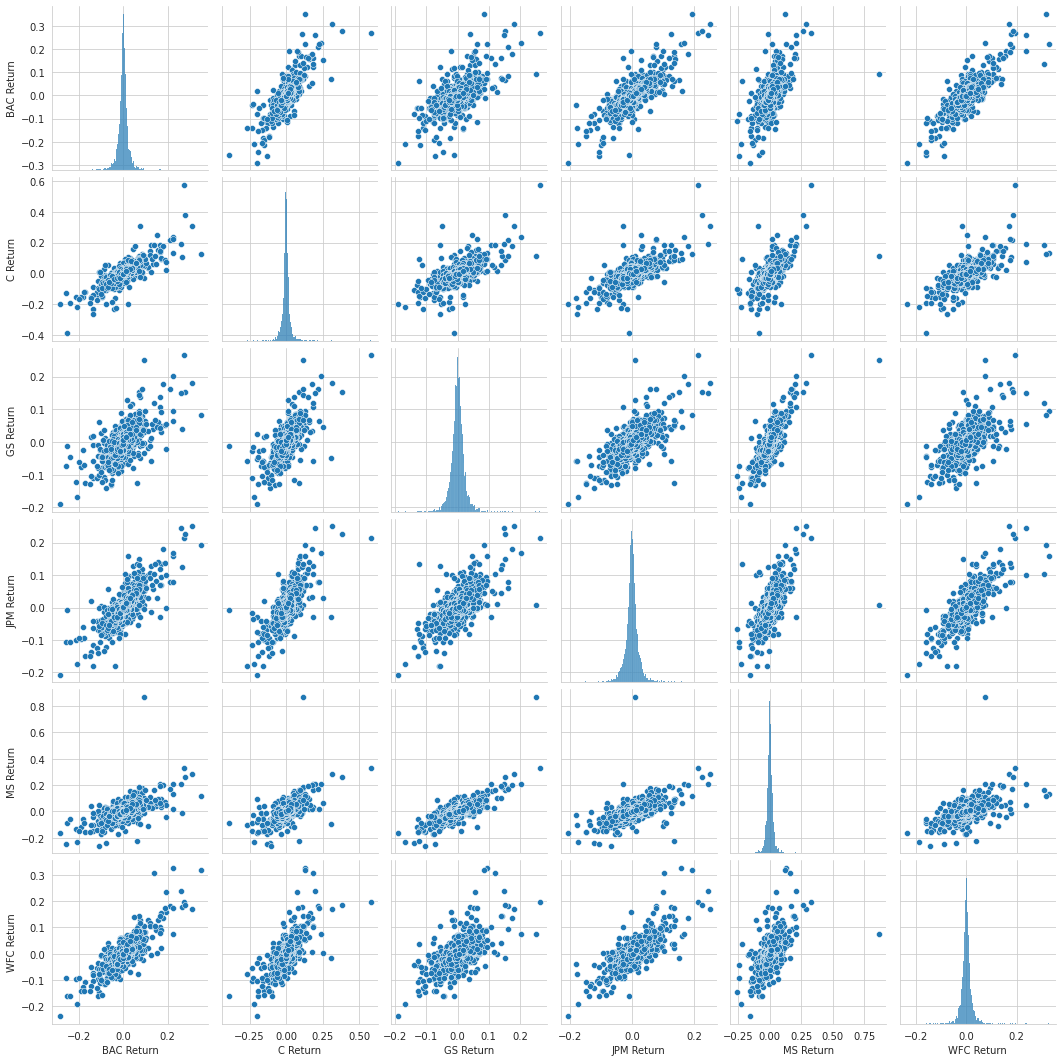

In [11]:
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

### Best Returns

In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Worst Returns

In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### Standard Deviatiion

In [14]:
returns.std()

BAC Return    0.029140
C Return      0.031082
GS Return     0.023626
JPM Return    0.024819
MS Return     0.031759
WFC Return    0.024702
dtype: float64

### Recent Risk

In [15]:
risk_sd = datetime.date(2020,1,1)
risk_ed = datetime.date.today()
returns.loc[risk_sd:risk_ed].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

## Distribution plot - 2020
___

### Morgan Stanley


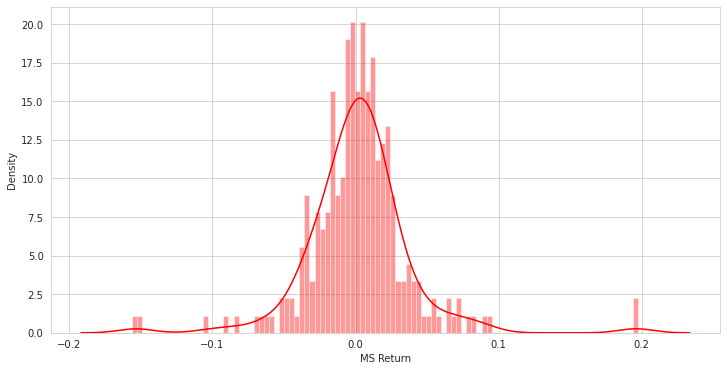

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc[risk_sd:risk_ed]['MS Return'],color='red',bins=100)

### Citigroup

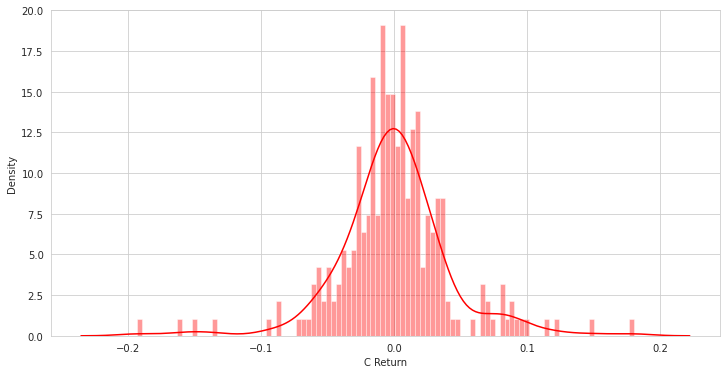

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc[risk_sd:risk_ed]['C Return'],color='red',bins=100)

____
## More Visualization

### Import

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

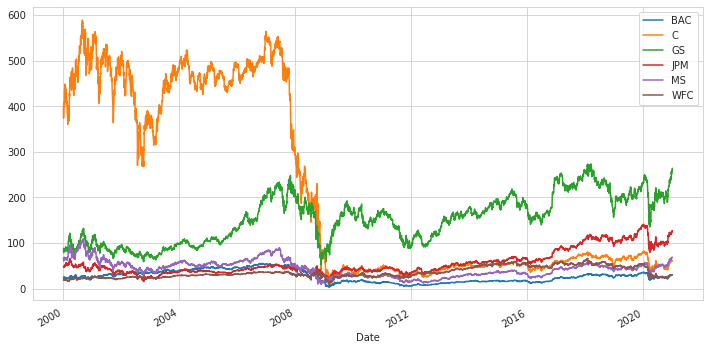

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,6),label=tick)
plt.legend()

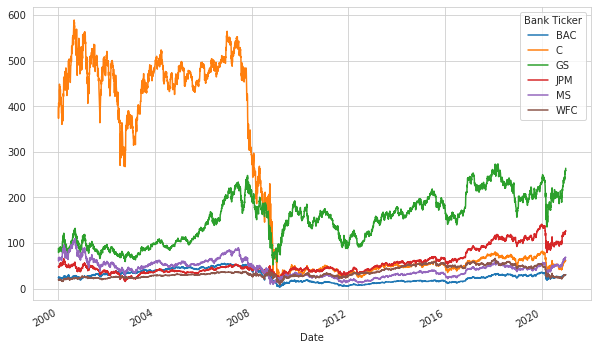

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(10,6))

## Moving Averages
___
Analyzing the moving averages for the stocks between 2020-Present.

### Line Plot

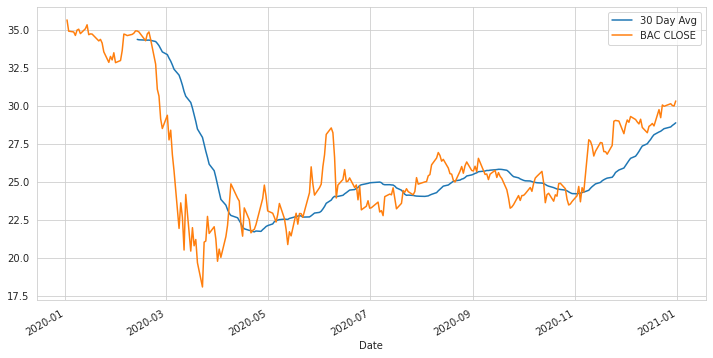

In [21]:
plt.figure(figsize=(12,6))
BAC['Close'].loc[risk_sd:risk_ed].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc[risk_sd:risk_ed].plot(label='BAC CLOSE')
plt.legend()

### Heatmap

Correlation between the stocks Close Price.

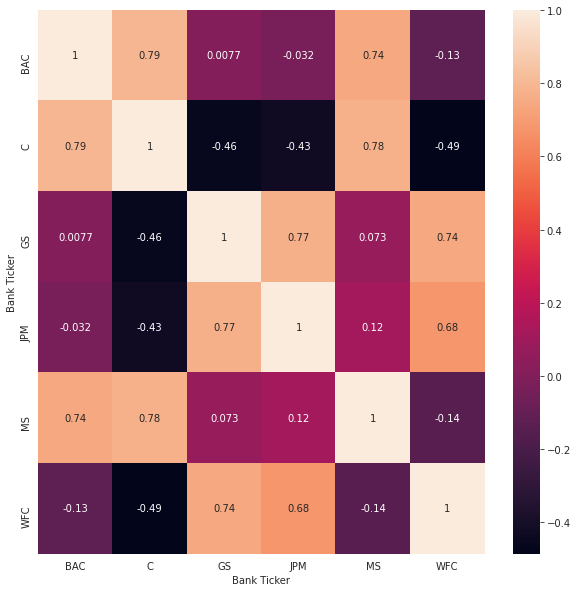

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

### Clustermap

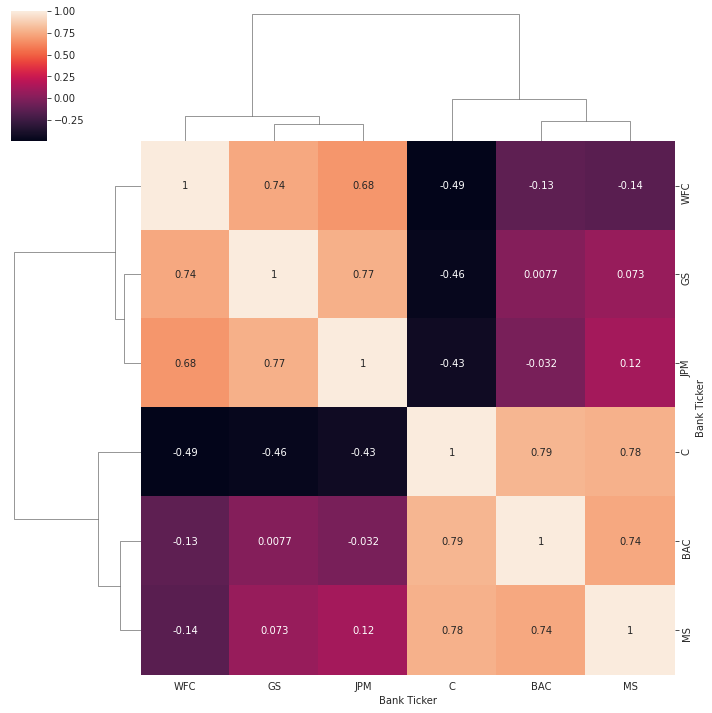

In [23]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

___
___